In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_table('../datasets/mushroom.data', sep = ',', header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
df.rename(columns={0: 'Class', 1: 'cap-shape', 2: 'cap-surface', 3: 'cap-color', 4: 'bruises',
                            5: 'odor', 6: 'gill-attachment', 7: 'gill-spacing', 8: 'gill-size', 9: 'gill-color',
                            10: 'stalk-shape', 11:'stalk-root',12:'stalk-surface-above-ring',13:'stalk-surface-below-ring',
                              14: 'stalk-color-above-ring', 15:'stalk-color-below-ring', 16:'veil-type', 17:'veil-color',
                              18:'ring-number', 19:'ring-type', 20:'spore-print-color', 21:'population', 22:'habitat'}, inplace = True)

In [4]:
df.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df['Class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: Class, Length: 8124, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
df['Class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: Class, Length: 8124, dtype: int32

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [9]:
#Check for missing values
df.isnull().sum()

Class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
# ML algorithms use math so we do not need string variables(animal names)
data = df.copy()

x = data.drop("Class",axis = 1)# input data
y = data.Class.values# target data

In [11]:
x.shape,y.shape

((8124, 22), (8124,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of y_train=>',y_train.shape)
print('Shape of y_test=>',y_test.shape)

Shape of X_train=> (4874, 22)
Shape of X_test=> (3250, 22)
Shape of y_train=> (4874,)
Shape of y_test=> (3250,)


## Decision Tree Classifier

In [13]:
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train,y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Test Accurary : ",decision_tree.score(X_test,y_test))
print("Train Accurary : ",decision_tree.score(X_train,y_train))

Test Accurary :  1.0
Train Accurary :  1.0


In [14]:
y_pred_tree

array([0, 1, 1, ..., 1, 1, 1])

In [15]:
cm_Dtree = confusion_matrix(y_test,y_pred_tree)
cr_Dtree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_Dtree)
print("classification report : \n",cr_Dtree)

confusion matrix : 
 [[1678    0]
 [   0 1572]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



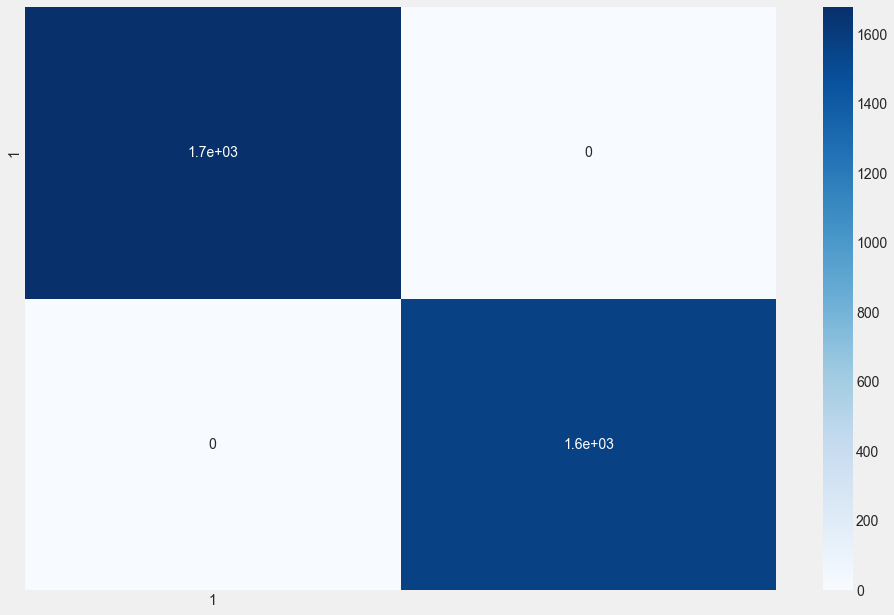

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(cm_Dtree,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Blues")
plt.show()

In [17]:
#Get column names

col_names = list(x.columns)
col_names

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

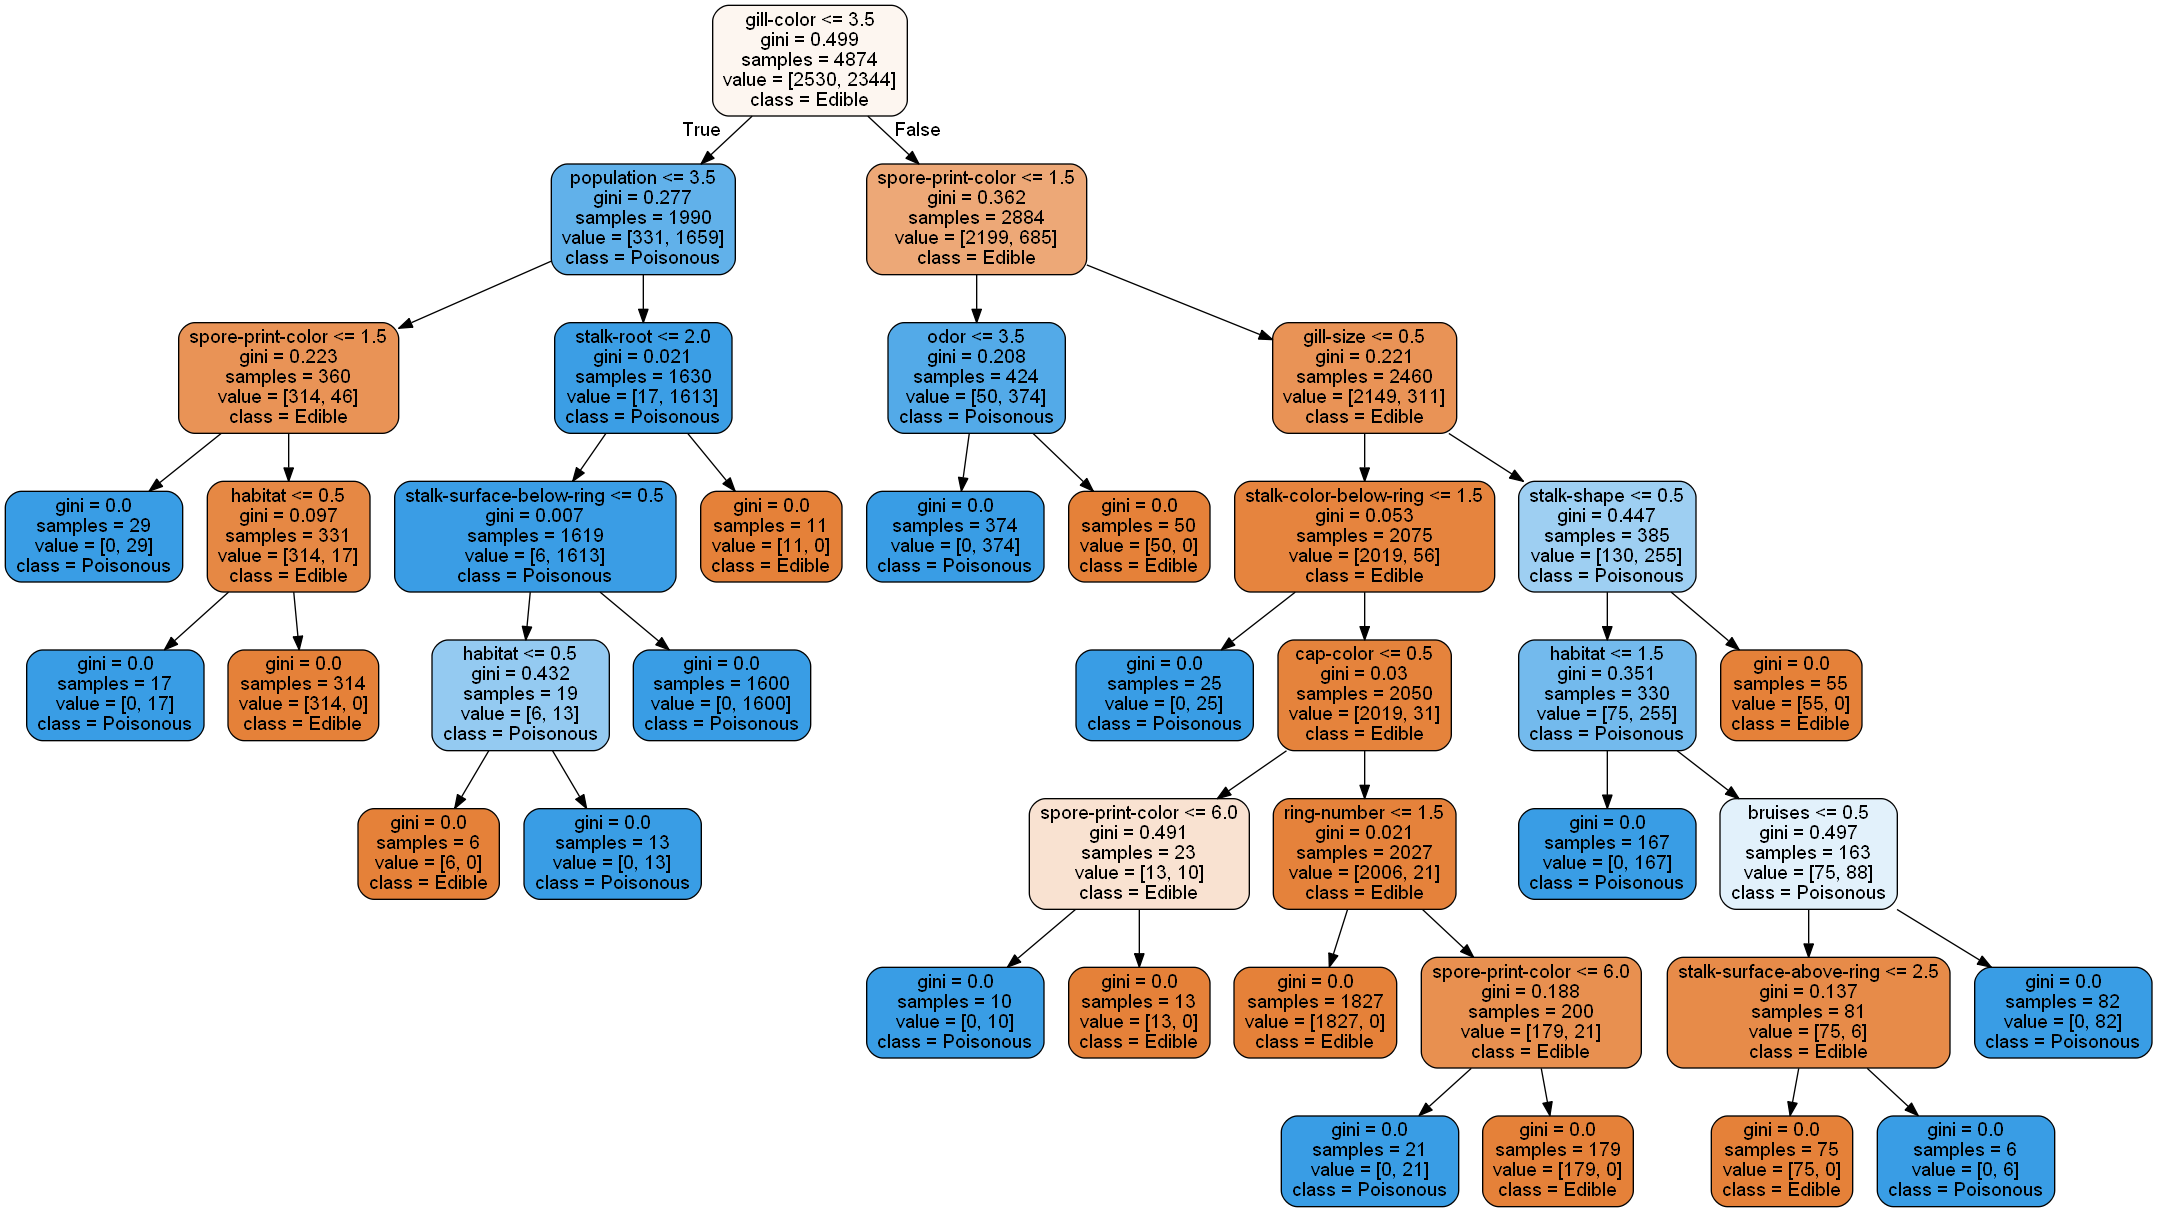

In [18]:
ddata=tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["Edible", "Poisonous"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 1, 1, ..., 1, 1, 1])

In [22]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

confusion matrix : 
 [[1678    0]
 [   0 1572]]
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



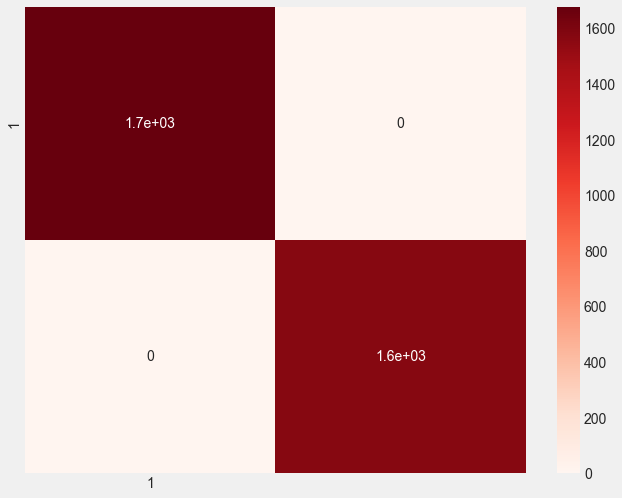

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,2),yticklabels = np.arange(1,2),cmap = "Reds")
plt.show()

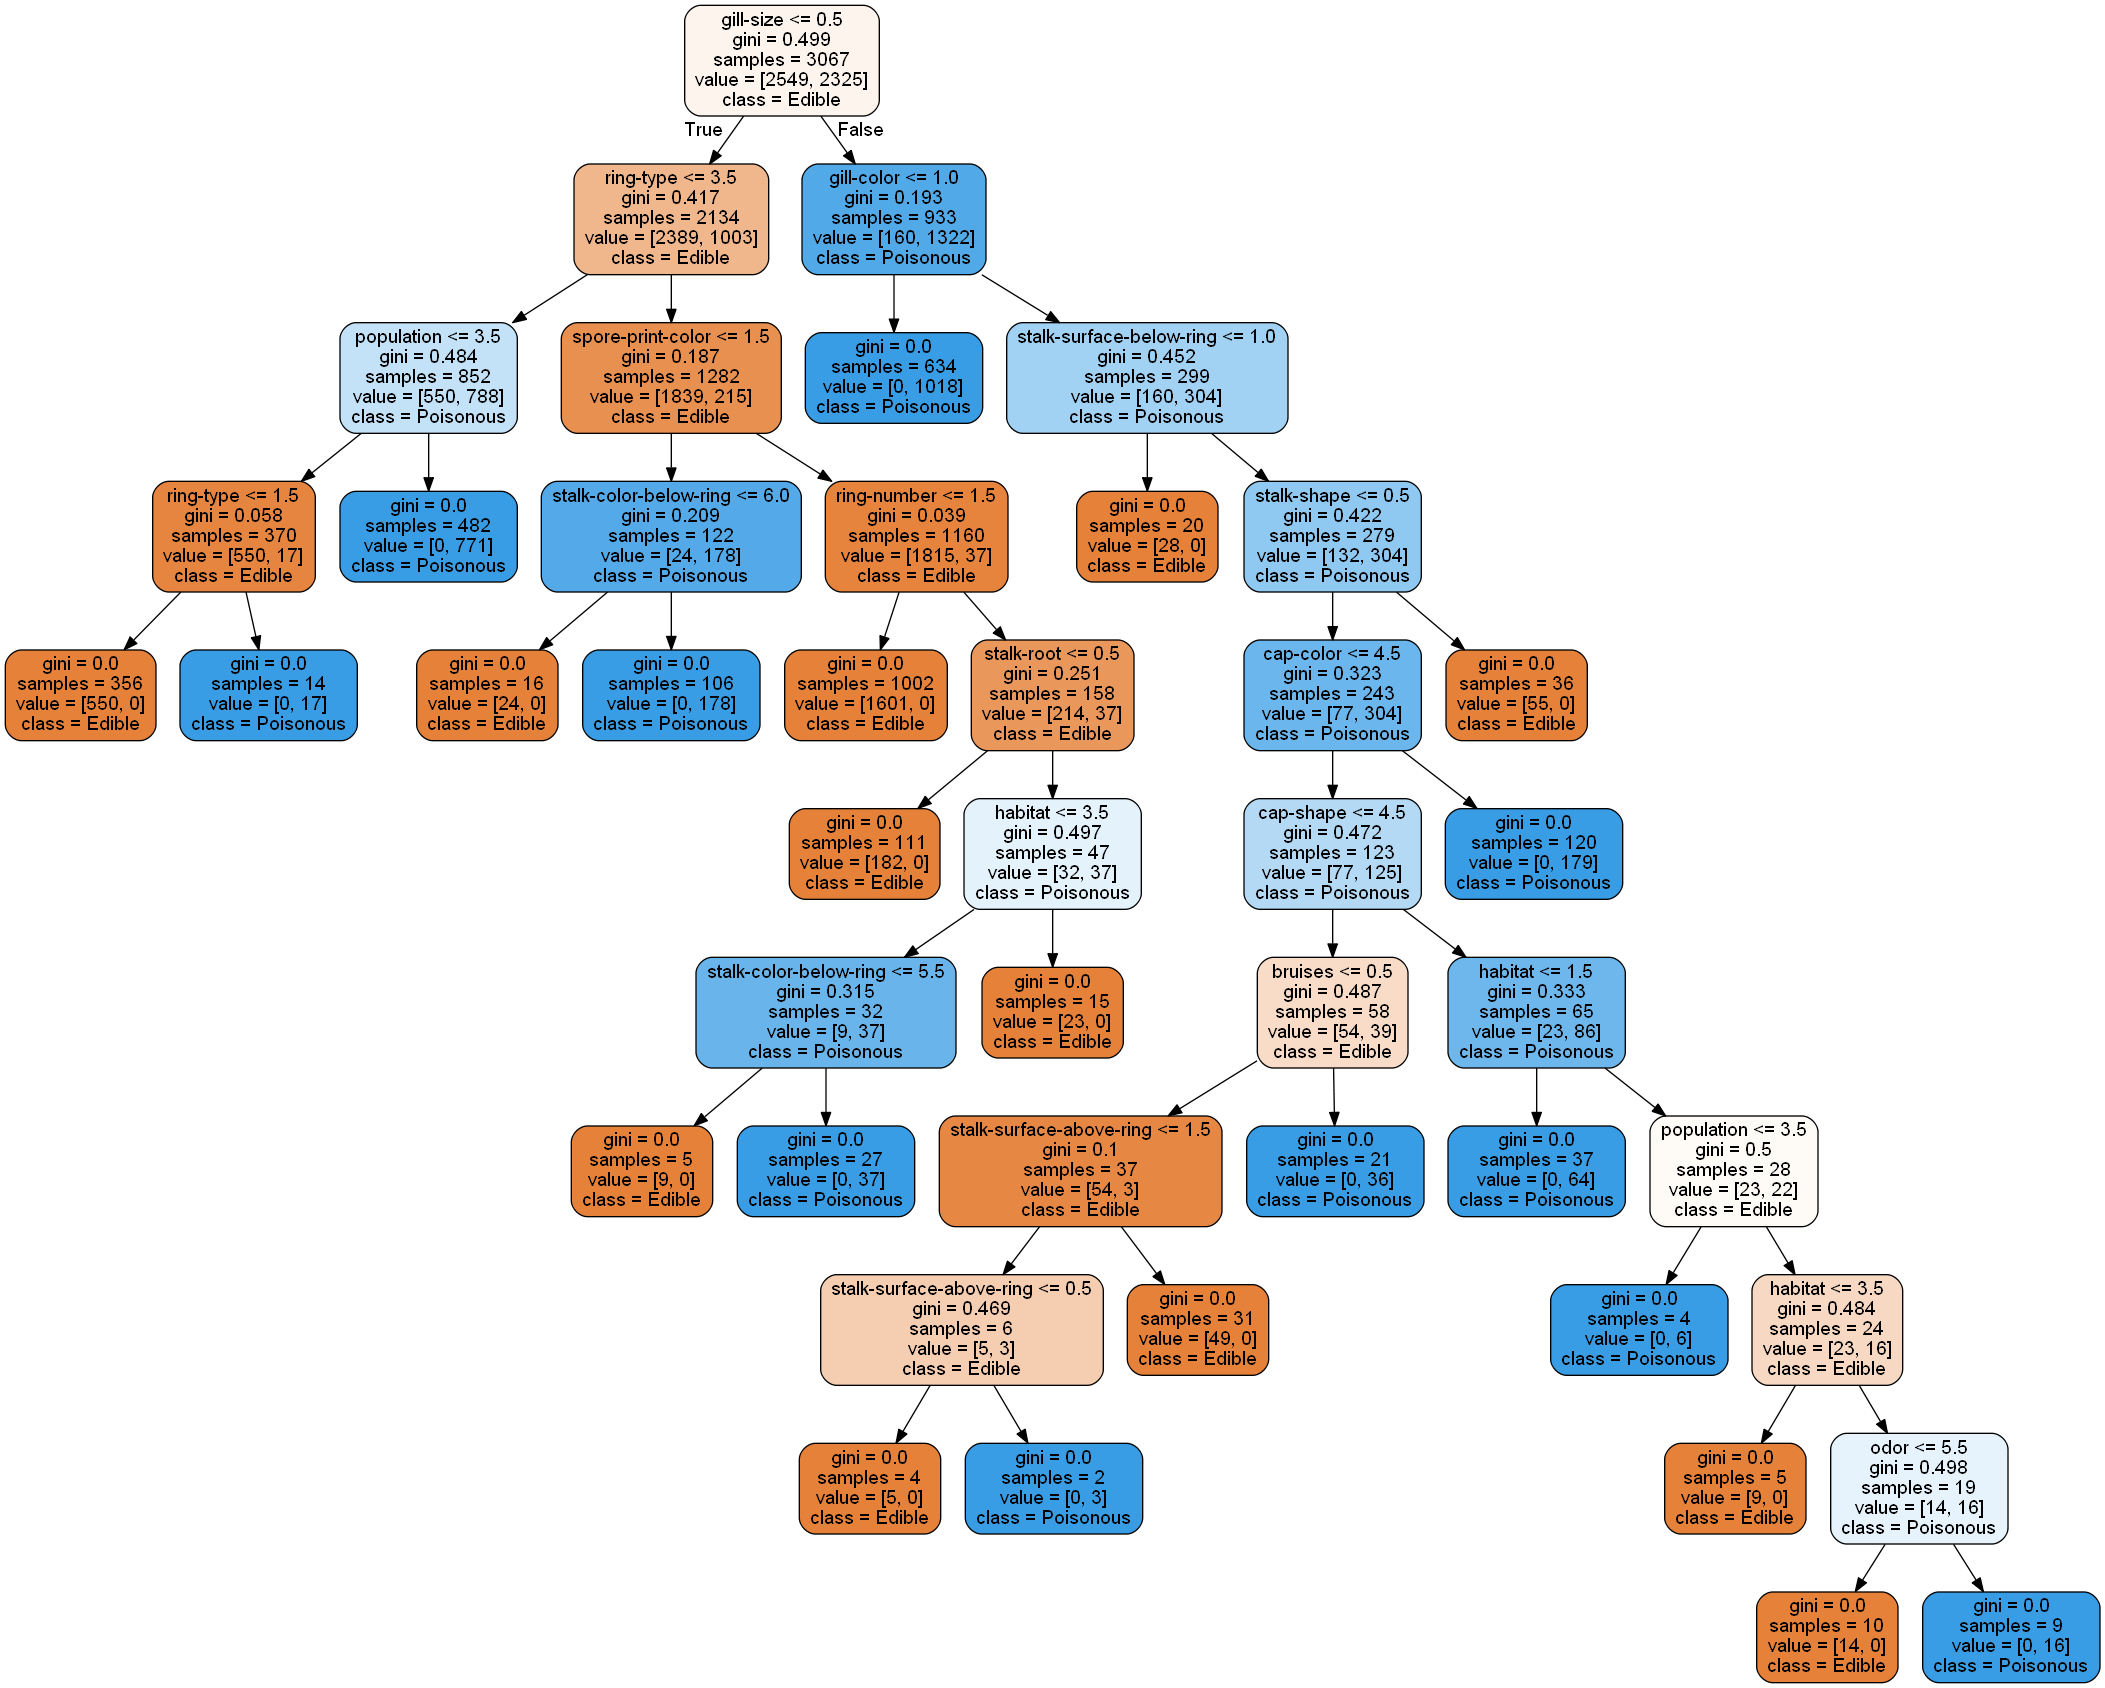

In [24]:
ddata=tree.export_graphviz(rf.estimators_[4],out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["Edible", "Poisonous"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## SVM Classification

In [25]:
from sklearn.svm import SVC

svm = SVC(random_state = 42,kernel = "linear")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("Train Accurary : ",svm.score(X_train,y_train))
print("Test Accuray : ",svm.score(X_test,y_test))

Train Accurary :  0.9595814526056627
Test Accuray :  0.9603076923076923


In [26]:
y_pred_svm

array([0, 1, 1, ..., 1, 1, 1])

In [27]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[1609   69]
 [  60 1512]]
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1678
           1       0.96      0.96      0.96      1572

    accuracy                           0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250



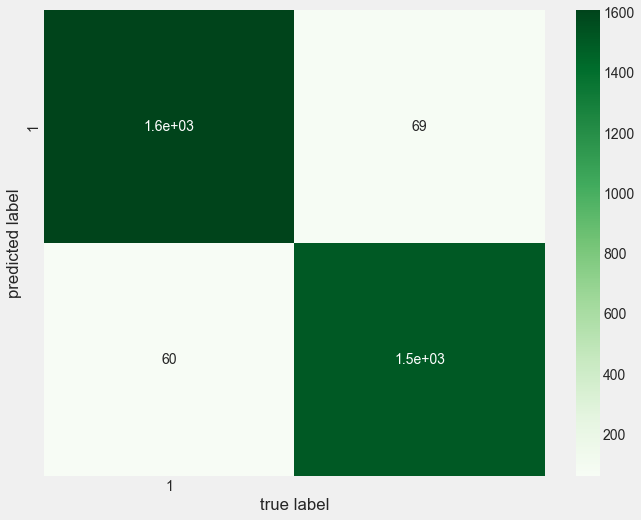

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Greens",xticklabels = np.arange(1,2),yticklabels = np.arange(1,2))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()